# House Price Predicting Model - Using Linear Regression

<!-- By Jibin K -->

## Task:

Implement a Linear Regression model to predict the prices of houses based on their Square Footage and the number of bedrooms and bathrooms.

In [1]:
# Importing required libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the training dataset
df_train = pd.read_csv("train.csv")

## Display the basic info

In [3]:
# Data shape - row and column
df_train.shape

(1460, 81)

In [4]:
# Data head - first 5 rows
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Data info 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Data summary
df_train.describe(include=df_train.dtypes.to_list()).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,1460.0,NaN,NaN,NaN,730.5,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,NaN,NaN,NaN,56.89726,42.300571,20.0,20.0,50.0,70.0,190.0
MSZoning,1460,5,RL,1151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,1201.0,NaN,NaN,NaN,70.049958,24.284752,21.0,59.0,69.0,80.0,313.0
LotArea,1460.0,NaN,NaN,NaN,10516.828082,9981.264932,1300.0,7553.5,9478.5,11601.5,215245.0
...,...,...,...,...,...,...,...,...,...,...,...
MoSold,1460.0,NaN,NaN,NaN,6.321918,2.703626,1.0,5.0,6.0,8.0,12.0
YrSold,1460.0,NaN,NaN,NaN,2007.815753,1.328095,2006.0,2007.0,2008.0,2009.0,2010.0
SaleType,1460,9,WD,1267,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SaleCondition,1460,6,Normal,1198,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data preprocessing

Based on task we focus on featurs:

    GrLivArea
    BedroomAbvGr
    FullBath
    SalePrice

In [7]:
df_train[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'SalePrice']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   GrLivArea     1460 non-null   int64
 1   BedroomAbvGr  1460 non-null   int64
 2   FullBath      1460 non-null   int64
 3   SalePrice     1460 non-null   int64
dtypes: int64(4)
memory usage: 45.8 KB


In [8]:
df_train[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'SalePrice']].describe().T

,count,mean,std,min,25%,50%,75%,max
GrLivArea,1460.0,1515.463699,525.480383,334.0,1129.5,1464.0,1776.75,5642.0
BedroomAbvGr,1460.0,2.866438,0.815778,0.0,2.0,3.0,3.00,8.0
FullBath,1460.0,1.565068,0.550916,0.0,1.0,2.0,2.00,3.0
SalePrice,1460.0,180921.195890,79442.502883,34900.0,129975.0,163000.0,214000.00,755000.0


In [9]:
# Checking for missing values
df_train[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'SalePrice']].isnull().sum()

GrLivArea       0
BedroomAbvGr    0
FullBath        0
SalePrice       0
dtype: int64

## Exploratory data analysis

<Figure size 1200x600 with 0 Axes>

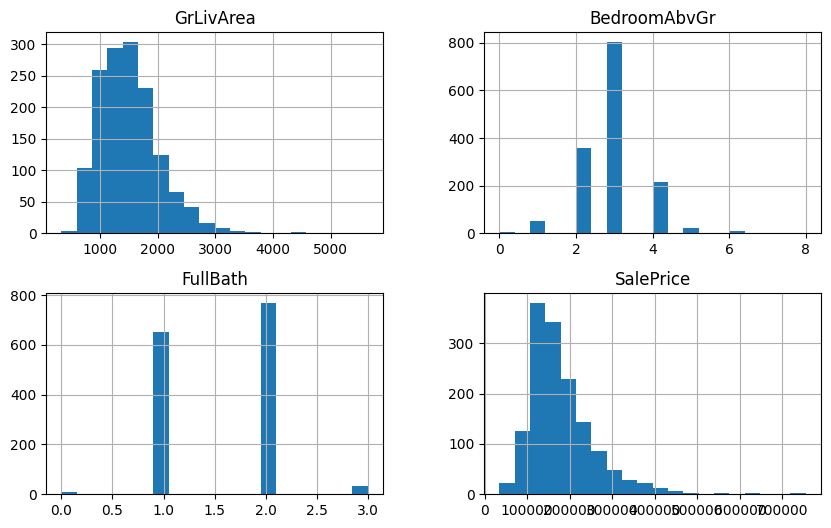

In [10]:
# EDA - Visualizing feature distributions
plt.figure(figsize=(12, 6))
df_train[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'SalePrice']].hist(bins=20, figsize=(10, 6))
plt.show()

In [11]:
# Correlation matrix
corrmat = df_train[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'SalePrice']].corr()
corrmat

,GrLivArea,BedroomAbvGr,FullBath,SalePrice
GrLivArea,1.000000,0.521270,0.630012,0.708624
BedroomAbvGr,0.521270,1.000000,0.363252,0.168213
FullBath,0.630012,0.363252,1.000000,0.560664
SalePrice,0.708624,0.168213,0.560664,1.000000


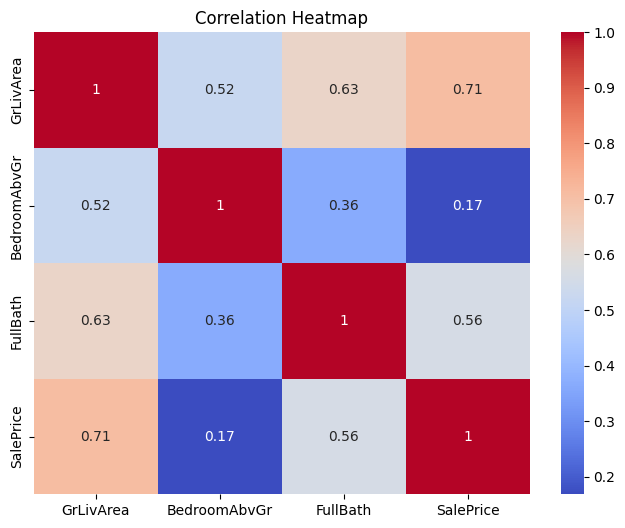

In [12]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corrmat, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Select Features and target

In [13]:
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
target = 'SalePrice'
X_train_full = df_train[features]
y_train_full = df_train[target]

In [14]:
#Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_full)

## Train-Validation Split

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X_train_scaled, y_train_full, test_size=0.2, random_state=42)

In [16]:
# Output the shapes of the new training and testing sets 
print("Training set shape (features):", X_train.shape) 
print("Validation set shape (features):", X_val.shape) 
print("Training set shape (target):", y_train.shape) 
print("Validation set shape (target):", y_val.shape)

Training set shape (features): (1168, 3)
Validation set shape (features): (292, 3)
Training set shape (target): (1168,)
Validation set shape (target): (292,)


## Linear Regression Model

In [17]:
# Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
# Model Predictions
y_pred = model.predict(X_val)

In [19]:
# Evaluate Model Performance
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

In [20]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 2806426667.25
Root Mean Squared Error: 52975.72
R² Score: 0.6341


## Visualizing Actual vs Predicted Prices

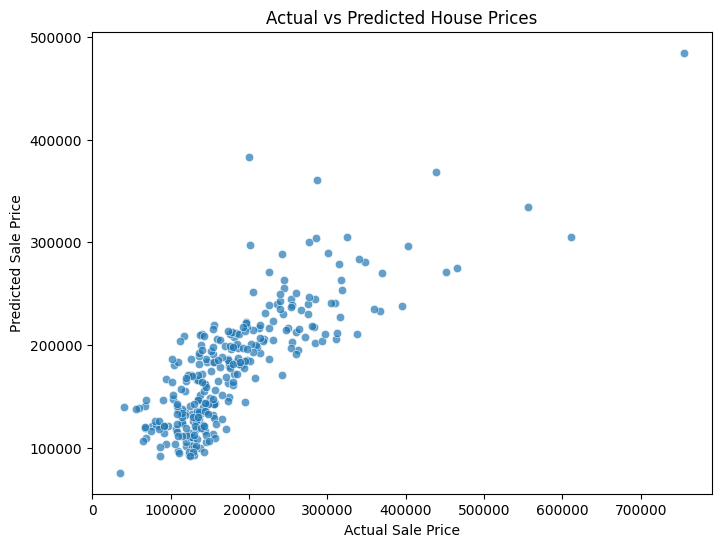

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_val, y=y_pred, alpha=0.7)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted House Prices")
plt.show()

## Testing with Unseen data

In [22]:
# Load and Preprocess Unseen Test Data
df_test = pd.read_csv("test.csv")

In [23]:
# Keep the same features as training data
X_test = df_test[features]

In [24]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   GrLivArea     1459 non-null   int64
 1   BedroomAbvGr  1459 non-null   int64
 2   FullBath      1459 non-null   int64
dtypes: int64(3)
memory usage: 34.3 KB


In [25]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
GrLivArea,1459.0,1486.045922,485.566099,407.0,1117.5,1432.0,1721.0,5095.0
BedroomAbvGr,1459.0,2.854010,0.829788,0.0,2.0,3.0,3.0,6.0
FullBath,1459.0,1.570939,0.555190,0.0,1.0,2.0,2.0,4.0


In [26]:
# Scale the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [27]:
# Predict House Prices on test data
y_test_pred = model.predict(X_test_scaled)

In [28]:
# Save Predictions to CSV 
df_test["PredictedPrice"] = y_test_pred
df_test.to_csv("house_price_predictions.csv", index=False)
print("house_price_predictions.csv  created")

house_price_predictions.csv  created


In [29]:
result = pd.DataFrame({'Id': df_test['Id'] , 'SalePrice': np.round(y_test_pred, 2)})
result.to_csv("house_price_predictions_Id_SalePrice.csv", index=False)
print("house_price_predictions_Id_SalePrice.csv  created")

house_price_predictions_Id_SalePrice.csv  created
